# **A brief intro to the most useful kind of algebra (linear)**
---

If you've ever wondered how R or python gives you regression coefficients, the answer is linear algebra! Linear algebra operations are essential to almost all modern methods for analyzing or modeling data. In this post I will first go through through some linear algebra basics, then build up to finding the ordinary least squares estimate for multiple linear regression. To try and make this self-contained, I will start from the basics. For the linear regression part, I will just assume knowledge of basic derivative rules, e.g., finding the derivative of $(a - bx)^2$ with respect to $x$. 

# Building up to matrices
We begin with the building block of *scalars*, which here will refer to any real number. A variable referring to a scalar will be a lower-case letter such as $x$. For example, $x$ can refer to the recording of a neuroimaging sensor at a particular time, or in general the value of a sample's measurement.

We can arrange a list of scalars into a *vector*. We can enumerate the entries of a vector through a subscript, e.g., $x_1$ refers to the first entry of a vector. Vectors will be denoted with a bold-faced lower-case letter, $\mathbf{x}$, and can be visualized in the following way:

\begin{equation*}
    \mathbf{x} = \begin{bmatrix} x_{1} \\x_{2} \\ \vdots \\ x_{n} \end{bmatrix}
\end{equation*}

Where we have a list of $n$ scalars. The number of scalars in a vector $n$ is referred to as the *dimensionality* of the vector. A more mathematically formal way of stating this is that $\mathbf{x} \in \mathbb{R}^n$, which states that the vector $\mathbf{x}$ belongs to a set of all (real) vectors with dimension $n$. 

Importantly, vectors can be thought of as an arrow in $n$-dimensional space. The arrow goes from the origin of the space to the coordinates listed in the vector. A vector's $L_2$ norm or *length* is denoted by:

\begin{equation*}
\Vert \mathbf{x} \Vert = \sqrt{\sum_{i=1}^{n}x_i^2}
\end{equation*}

Which is the Euclidean distance from the origin to the vector tip. 

(An aside: As human beings, we're mostly limited to reasoning about 2-dimensional and 3-dimensional spaces. However, the data we collect is often higher-dimensional. The wonder of linear algebra is that it allows us us to reason and have intuitions about much higher-dimensional vectors and spaces.)

## Basic vector operations
Some basic things we can do with a vector are: 
- multiply the vector with a scalar
- add the vector to another vector
- find a scalar value called the *dot product* or *inner product* of the vector with another vector
 - (there's also an *outer product*, but we'll come back to that in a bit) 

Multiplying a vector with a scalar produces another vector, and can be thought of as scaling the vector in space (it points in the same direction but is larger or smaller):

\begin{equation*}
  a \mathbf{x} = \begin{bmatrix} ax_{1} \\ ax_{2} \\ \vdots \\ ax_{n} \end{bmatrix}
\end{equation*}

We can add vectors, provided they have the same dimension:

\begin{equation*}
  \mathbf{x + y} = 
  \begin{bmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix} +
  \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix} =
  \begin{bmatrix} x_1 + y_{1} \\ x_2 + y_{2} \\ \vdots \\ x_n + y_{n} \end{bmatrix}
\end{equation*}

We can define a dot product between two same-sized vectors, which is a scalar that indicates something about the angle between the vectors ($\theta$) in space. 

\begin{align*}
  \mathbf{x \cdot y} &= x_1 y_{1} + x_2 y_{2} + \cdots + x_n y_{n} = \sum_{i=1}^{n} x_iy_i  \\
  &= \Vert \mathbf{x} \Vert \Vert \mathbf{y} \Vert \cos(\theta)
\end{align*}

Thus, if two vectors are oriented at $90^\circ$ relative to each other - that is, they are *orthogonal* - their dot product is $0$. This last formulation allows us to define the concept of angles in higher than 3-dimensional space. 

The dot product of a vector with itself is its length squared:

\begin{equation}
  \mathbf{x \cdot x} = \Vert \mathbf{x} \Vert^2 = \sum_{i=1}^{n} x_i^2 
\end{equation}

## Matrices
A list of vectors of the same dimension can form another mathematical object called a *matrix*, commonly denoted as upper-case bold letters, such as $\mathbf{X}$: 

\begin{equation*}
  \mathbf{X} = 
  \begin{bmatrix} 
    x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n,1} & x_{n,2} & \cdots & x_{n,p}
  \end{bmatrix}
\end{equation*}

In most data matrices, $x_{n,p}$ is a scalar variable indicating the measurement of the $p^{th}$ dimension of the $n^{th}$ sample. As with vectors, we can formally state $\textbf{X} \in \mathbb{R}^{n \times p}$, indicating that the matrix $\textbf{X}$ has $n$ rows and $p$ columns. A more common way to state this is that the shape of $\mathbf{X}$ is $(n, p)$. 

We can think of matrices as a list of column vectors. For example, we could think of our data matrix as: 

\begin{equation*}
  \mathbf{X} = 
  \left[ \begin{array}{c | c | c | c }
      x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
      x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
      \vdots & \vdots & \ddots & \vdots \\
      x_{n,1} & x_{n,2} & \cdots & x_{n,p} \end{array}
  \right] = 
  \begin{bmatrix} 
    | & | & & | \\ 
    \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_p \\ 
    | & | & & |
  \end{bmatrix}
\end{equation*}

Here we have a list of $p$ vectors $\mathbf{x}_1, \dots, \mathbf{x}_p$, all of which are $n$-dimensional. In other words, each vector $\mathbf{x}_i$ represents all of the samples' data for whatever the $i^{\textrm{th}}$ dimension was measuring. 

We could also think of a matrix as a list of row vectors. A row of $\mathbf{X}$ indicates all of the dimensions of a particular sample: 

\begin{equation*}
  \mathbf{X} = 
  \left[ \begin{array}{c c c c }
      x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\ 
      \hline
      x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
      \hline
      \vdots & \vdots & \ddots & \vdots \\
      \hline
      x_{n,1} & x_{n,2} & \cdots & x_{n,p} \end{array}
  \right] = 
  \begin{bmatrix} 
    - \; \mathbf{x}_1^\top \; - \\ 
    - \; \mathbf{x}_2^\top \; - \\ 
    \vdots \\ 
    - \; \mathbf{x}_n^\top \; -\\
  \end{bmatrix}
\end{equation*}

Here we have $n$ row vectors (they are different than column vectors), which are denoted as $\mathbf{x}_1^\top, \dots, \mathbf{x_n}^\top$. These $n$ vectors represent one sample each, and are of dimension $p$ which indicates that there were $p$ dimensions measured. 

If you're wondering where the $^\top$ symbol comes from, it's actually the *transpose* of a matrix. It is denoted by a superscript $\mathbf{X}^\top \in \mathbb{R}^{p \times n}$ and is an operation which turns each of the rows of $\mathbf{X}$ into columns of $\mathbf{X}^\top$. In other words, if $\mathbf{X}$ is of shape $(n,p)$, then $\mathbf{X}^\top$ will be of shape $(p,n)$:

\begin{equation*}
  \mathbf{X}^\top = 
  \begin{bmatrix} 
    x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
    x_{1,2} & x_{2,2} & \cdots & x_{n,2} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{1,p} & x_{2,p} & \cdots & x_{n,p}
  \end{bmatrix}
\end{equation*}

Here we now have dimensions measured as columns and samples as rows. In essence, row vectors are transposes of column vectors. 




In [182]:
# working with vectors and matrices in numpy
import numpy as np 

# defining vectors (1d array)
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 3, 4])

# somewhat confusingly, vectors (1d arrays) in numpy are printed horizontally
print('x is:\t', x)
print('y is:\t', y)
print('x shape:', x.shape)
print('---------')

# operations
print('5x = \t', 5*x)
print('x + y =\t', x+y)
print('x * y =\t', x.dot(y))
print('---------')

# defining a matrix (2d array)
n, p = 5, 3 # 5 samples, 3 dims
X = np.random.randint(10, size=(n,p))   # random integer matrix
print('X looks like:\n', X)
print('X is of shape: ', X.shape)
print('---------')

# transpose
print('X transpose:\n', X.T)            # numpy syntax for transpose
print('X transpose shape: ', X.T.shape)

x is:	 [0 1 2 3]
y is:	 [1 2 3 4]
x shape: (4,)
---------
5x = 	 [ 0  5 10 15]
x + y =	 [1 3 5 7]
x * y =	 20
---------
X looks like:
 [[4 9 6]
 [2 1 7]
 [0 1 3]
 [0 9 9]
 [0 5 6]]
X is of shape:  (5, 3)
---------
X transpose:
 [[4 2 0 0 0]
 [9 1 1 9 5]
 [6 7 3 9 6]]
X transpose shape:  (3, 5)


# Matrix-vector multiplication
Multiplying a matrix with a vector results in a new vector. A way to intuit matrix-vector multiplication is to consider the matrix as a a "machine" which acts on the input vector and produces an output vector of a particular dimension. In this case, the matrix must have the dimensionality of the row vectors be equal to the dimensionality of the input vector. 

There are two ways to frame matrix-vector multiplications, which result from thinking about the matrix as a either a collection of column vectors or row vectors. 
- We can get the output vector by weighting the columns of the matrix with the entries of the input vector and summing these weighted vectors. 
- Alternatively, we can get each element of the output vector by doing the dot product of the rows of the matrix with the input vector. 

Both perspectives will be useful for the rest of this post. Either way, if we have a size $(n, p)$ matrix, that means we can do matrix-vector multiplication by giving it a $p$-dimensional vector, and our output will be an $n$-dimensional vector. To illustrate, let's define a $(2 \times 3)$ matrix $\mathbf{A}$ and a $3$-dimensional vector $\mathbf{b}$:

\begin{align*}
  \mathbf{A} = 
  \begin{bmatrix}
    \color{SteelBlue}{a_{1,1}} & \color{DarkGoldenrod}{a_{1,2}} & \color{green}{a_{1,3}} \\
    \color{DeepSkyBlue}{a_{2,1}} & \color{orange}{a_{2,2}} & \color{SpringGreen}{a_{2,3}} \\
  \end{bmatrix}, 
  \quad \quad 
  \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}
\end{align*}

The different colors (blue, orange, green) are different columns, and darker/lighter are different rows. Now, we are looking to find the output vector $\mathbf{c = Ab}$:

\begin{equation}
  \mathbf{c} = 
  \begin{bmatrix}
    \color{SteelBlue}{a_{1,1}} & \color{DarkGoldenrod}{a_{1,2}} & \color{green}{a_{1,3}} \\
    \color{DeepSkyBlue}{a_{2,1}} & \color{orange}{a_{2,2}} & \color{SpringGreen}{a_{2,3}} \\
  \end{bmatrix} \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix}
\end{equation}

How do we actually multiply these things together? Let's see the first way of framing matrix-vector multiplication, which is to consider weighting the columns of $\mathbf{A}$ with the elements of $\mathbf{b}$:

\begin{equation*}
  \mathbf{c} = 
  \begin{bmatrix} c_{1} \\ c_{2} \end{bmatrix} = 
  b_1 \color{SteelBlue}{{\begin{bmatrix} a_{1,1} \\ \color{DeepSkyBlue}{a_{2,1}} \end{bmatrix}}} + 
  b_2 \color{DarkGoldenrod}{{\begin{bmatrix} a_{1,2} \\ \color{orange}{a_{2,2}} \end{bmatrix}}} + 
  b_3 \color{green}{{\begin{bmatrix} a_{1,3} \\ \color{SpringGreen}{a_{2,3}} \end{bmatrix}}} = 
  \mathbf{Ab}
\end{equation*}

For this case, imagine taking the elements of $\mathbf{b}$ and putting them in front of the columns of $\mathbf{A}$ as scalar multiples, then summing up those scaled columns. In some sense, the columns of matrix $\mathbf{A}$ provide a set of basis patterns which are weighted and summed to produce $\mathbf{c}$. 

If we do a little rearranging of the above definition, we can get the other way of framing matrix-vector multiplication:

\begin{equation}
  \begin{bmatrix} c_1 \\ c_2 \end{bmatrix} =
  \begin{bmatrix} 
    b_1 \color{SteelBlue}{a_{1,1}} + b_2 \color{DarkGoldenrod}{a_{1,2}} + b_3 \color{green}{a_{1,3}} \\ 
    b_1 \color{DeepSkyBlue}{a_{2,1}} + b_2 \color{orange}{a_{2,2}} + b_3 \color{SpringGreen}{a_{2,3}}
  \end{bmatrix}
\end{equation}

Where

\begin{align}
  c_1 &=
  b_1 \color{SteelBlue}{a_{1,1}} + b_2 \color{DarkGoldenrod}{a_{1,2}} + b_3 \color{green}{a_{1,3}} = 
   \begin{bmatrix} \color{SteelBlue}{a_{1,1}} \\ \color{DarkGoldenrod}{a_{1,2}} \\ \color{green}{a_{1,3}} \end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \\ \\
  c_2 &= b_1 \color{DeepSkyBlue}{a_{2,1}} + b_2 \color{orange}{a_{2,2}} + b_3 \color{SpringGreen}{a_{2,3}} = 
  \begin{bmatrix} \color{DeepSkyBlue}{a_{2,1}} \\ \color{orange}{a_{2,2}} \\ \color{SpringGreen}{a_{2,3}} \end{bmatrix} \cdot \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} 
\end{align}

That is, the elements of $\mathbf{c}$ are the dot products of the row vectors of $\mathbf{A}$ with $\mathbf{b}$. For this case, imagine taking the vector $\mathbf{b}$ and putting it sideways on top of the matrix $\mathbf{A}$. Then, the first element of $\mathbf{c}$ is the dot product of $\mathbf{b}$ with the first row of $\mathbf{A}$, the second element of $\mathbf{c}$ is the dot product of $\mathbf{b}$ with the second row of $\mathbf{A}$, and so on.

To recap, and in general for multiplying an $(n,p)$ matrix and a $p$ dimensional vector:

\begin{align*}
  \mathbf{c} &= \mathbf{Ab} \\
  \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ \vdots \\ c_n \end{bmatrix} 
  &= \begin{bmatrix} 
    | & | & | \\ 
    | & | & | \\ 
    \mathbf{a}_1 & \cdots & \mathbf{a}_p \\ 
    | & | & | \\
    | & | & | \\ 
  \end{bmatrix}
  \begin{bmatrix} b_{1} \\ \vdots \\ b_{p} \end{bmatrix} = 
  b_1 \mathbf{a}_1 + \cdots + b_p \mathbf{a}_p \\ \\
  \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ \vdots \\ c_n \end{bmatrix} &= \begin{bmatrix} 
    - \; \mathbf{a}_1^\top \; - \\ 
    - \; \mathbf{a}_2^\top \; - \\ 
    \vdots \\ \vdots \\ 
    - \; \mathbf{a}_n^\top \; - \\
  \end{bmatrix} \mathbf{b} =
  \begin{bmatrix} \mathbf{a}_1^\top\mathbf{b} \\ \mathbf{a}_2^\top\mathbf{b} \\ \vdots \\ \vdots \\ \mathbf{a}_n^\top\mathbf{b} \end{bmatrix}
\end{align*}

Either way, the output is an $n$-dimensional vector. 

### Vectors and vector operations as 1-dimensional matrices
Imagine we have a single row vector $\mathbf{a}^\top$ and a column vector $\mathbf{b}$, both of dimension $n$. If we consider the vector $\mathbf{a}^\top$ to be a size $(1, n)$ matrix and $\mathbf{b}$ to be an $n$ dimensional vector, we can see that the matrix-vector product $\mathbf{a}^\top\mathbf{b}$ should be a size $(1 \times 1)$ vector, otherwise known as a scalar. As it turns out, we've already seen this before as the dot product (or inner product):

\begin{align*}
  \mathbf{a} \cdot \mathbf{b} &= \mathbf{a}^\top \mathbf{b} \\
  \sum_{i=1}^{n} a_n b_n &= \begin{bmatrix} a_1 & a_2 & \cdots & a_n \end{bmatrix}
  \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{bmatrix}
\end{align*}

Let's now consider the outer product, sometimes denoted $\mathbf{a} \otimes \mathbf{b}$:

\begin{align*}
  \mathbf{a} \otimes \mathbf{b} =    
  \mathbf{a} \mathbf{b}^\top =
  \begin{bmatrix} a_1 \\ a_2 \\ \vdots \\ a_n \end{bmatrix}
  \begin{bmatrix} b_1 & b_2 & \cdots & b_n \end{bmatrix}
\end{align*}

What might it mean to multiply an $(n,1)$ matrix with a $(1,n)$ matrix?

## Matrix-matrix multiplication
We can now define how to multiply two matrices $\mathbf{A}$ and $\mathbf{B}$ together to get a matrix $\mathbf{C = AB}$. In fact, matrix-matrix multiplication is equivalent to doing a series of matrix-vector multiplications. That is, imagine $\mathbf{B}$ as a series of column vectors $\mathbf{b}_1, \cdots, \mathbf{b}_k$. Then, each column vector $\mathbf{c}_i$ will be equal to $\mathbf{Ab}_i$:

\begin{align*}
  \mathbf{C} &= \mathbf{AB} \\
  \begin{bmatrix} 
    c_{1,1} & c_{1,2} & \cdots & c_{1,k} \\ 
    c_{2,1} & c_{2,2} & \cdots & c_{2,k} \\
    \vdots & \vdots & \ddots & \vdots \\ 
    c_{n,1} & c_{n,2} & \cdots & c_{n,k}
  \end{bmatrix}  
  &= \begin{bmatrix} 
    a_{1,1} & \cdots & a_{1,p} \\ 
    a_{2,1} & \cdots & a_{2,p} \\
    \vdots & \ddots & \vdots \\ 
    a_{n,1} & \cdots & a_{n,p}
  \end{bmatrix} 
  \begin{bmatrix} 
    b_{1,1} & b_{1,2} & \cdots & b_{1,k} \\ 
    \vdots & \vdots & \ddots & \vdots \\ 
    b_{p,1} & b_{p,2} & \cdots & b_{p,k}
  \end{bmatrix} \\ \\
  \begin{bmatrix} \mathbf{c}_1 & \mathbf{c}_2 & \cdots & \mathbf{c}_k \end{bmatrix} 
  &= \begin{bmatrix} \mathbf{Ab}_1 & \mathbf{Ab}_2 & \cdots & \mathbf{Ab}_k \end{bmatrix}
\end{align*}

Thus, the first column of $\mathbf{C}$ is simply $\mathbf{Ab}_1$. This reveals one rule of matrix-matrix multiplication: the so-called *inner dimensions* of the matrices must agree in order for the multiplication to be defined. That is, $\mathbf{C = AB}$ is only defined when the matrix $\mathbf{A}$ has shape $(n, k)$ and the matrix $\mathbf{B}$ has shape $(k, p)$ for any $n$ and $p$. In other words, the rows of $\mathbf{A}$ must be of the same dimension as the columns of $\mathbf{B}$. Then, the output $\mathbf{C}$ will be of shape $(n,p)$.

Importantly, this tells us that matrix multiplication is *not* commutative. That is, $\mathbf{AB} = \mathbf{BA}$ is *not* generally true. In fact, if $\mathbf{B}$ is size $(k,p)$ and $\mathbf{A}$ is size $(n,k)$, then $\mathbf{BA}$ isn't even defined, as the inner dimensions do not agree. Thus, *left* multiplying a matrix is fundamentally different than *right* multiplying a matrix. 

## The identity matrix and matrix inverses
An identity matrix is a matrix with ones along the diagonal and zeros everywhere else. For example, size $2$ identity matrix is defined as:

\begin{equation}
  \mathbf{I}_2 = 
  \begin{bmatrix} 
    1 & 0 \\
    0 & 1
  \end{bmatrix}
\end{equation}

In general:

\begin{equation}
  \mathbf{I}_n = 
  \begin{bmatrix} 
    1 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & 1
  \end{bmatrix}
\end{equation}

We can think of the identity matrix as the matrix version of a 1 for matrix multiplication. In other words, $1*a = a$. Similarly, $\mathbf{Ib} = \mathbf{b}$, and $\mathbf{IA} = \mathbf{AI} = \mathbf{A}$. 

The inverse of a matrix only exists for square matrices (those with size $(n,n)$), and only certain square matrices at that. An inverse $\mathbf{A}^{-1}$ of a matrix $\mathbf{A}$ is defined such that $\mathbf{A}^{-1} \mathbf{A} = \mathbf{A} \mathbf{A}^{-1} = \mathbf{I}$. If we have an equation like $\mathbf{Ax} = \mathbf{b}$, and we wish to get $\mathbf{x}$ alone, we can *left* multiply by $\mathbf{A}^{-1}$:

\begin{align}
  \mathbf{Ax} &= \mathbf{b} \\
  \mathbf{A}^{-1} \mathbf{Ax} &= \mathbf{A}^{-1} \mathbf{b} \\
  \mathbf{x} &= \mathbf{A}^{-1} \mathbf{b}
\end{align}

In [ ]:
# matrix-vector 
n, p = 2, 3                       # 2 rows, 3 cols
A = np.arange(n*p).reshape((n,p)) # fast way to get 2d array with ordered ints
b = np.arange(p)                  # vectors don't have a second dimension in numpy
c = A @ b                         # syntax for matrix multiplication in numpy

print('A:\n', A)
print('------')
print('b:\n', b)   # remember b is a column vector, despite how it's printed
print('------')
print('c:\n', c)   # same with c

A:
 [[0 1 2]
 [3 4 5]]
------
b:
 [0 1 2]
------
c:
 [ 5 14]


In [ ]:
# let's try multiplying A with a 4-dim vector for fun
x = np.arange(4)
c = A.dot(x)  # another syntax for matrix multiplication in numpy

ValueError: ignored

In [ ]:
# matrix-matrix
n, p, k = 5, 3, 2
A = np.arange(n*p).reshape((n,p))
B = np.arange(p*k).reshape((p,k))
C = A @ B

print('A shape:', A.shape, '\n', A)
print('------')
print('B shape:', B.shape, '\n', B)
print('------')
print('C shape:', C.shape, '\n', C)
print('------')

# let's get first col of C:
b_1 = B[:, 0]
c_1 = A.dot(b_1)
print('c_1:\n', c_1)

A shape: (5, 3) 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------
B shape: (3, 2) 
 [[0 1]
 [2 3]
 [4 5]]
------
C shape: (5, 2) 
 [[ 10  13]
 [ 28  40]
 [ 46  67]
 [ 64  94]
 [ 82 121]]
------
c_1:
 [10 28 46 64 82]



# Estimating linear regression coefficients with matrix/vector operations
Let's put all the above to work to help us do linear regression.

We are all familiar with the most simplified univariate model: $y = mx + b$. To generalize this, we can consider more than one independent (input) variable by considering a model where we have a vector of $n$ observations $\mathbf{x}$ instead of a single observation $x$ and a vector of $n$ weights $\mathbf{b}$ instead of the single weight $m$. For instance, consider the model prediction for a single observation of $n$ regressors $x_1, x_2, \dots, x_p$:

\begin{equation*}
\hat{y}_i = b_0 + b_1 x_{1,i} + b_2 x_{2,i} + \cdots + b_p x_{p, i}
\end{equation*}

There's a lot of indices in that equation! We can simplify the notation using vectors, as this model is defined as the dot product of the regressors and the weights. We can also include the intercept $b_0$ in the vector of weights $\mathbf{b}$, so that it is of shape $(n, p+1)$:

\begin{align}
\hat{y}_i &= \mathbf{b} \cdot  \mathbf{x}_i = \mathbf{b}^\top \mathbf{x}_i
\end{align}

Where

\begin{equation*}
  \mathbf{b}^\top = \begin{bmatrix} b_0 & b_1 & b_2 & \cdots & b_p \end{bmatrix}  
  \quad \textrm{and} \quad
  \mathbf{x}_i = \begin{bmatrix} 1 \\ x_{1,i} \\ x_{2,i} \\ \vdots \\ x_{p,i} \end{bmatrix}
\end{equation*}

If we want to estimate the coefficients $\mathbf{b}$ we can do a bit more linear algebra and some calculus to find the solution as an optimization problem. More specifically, we first have to define the objective, i.e., the thing we want to minimize. It stands to reason that we want to minimize the error of our model predictions over all our data. Then, we take the derivative of the error with respect to the parameters we want to find (the coefficients), and set that expression equal to 0. Finally, we find the values of $\mathbf{b}$ which solve those derivative equations. 

To begin, let's define the error for sample $i$ as:

\begin{align*}
  \epsilon_i &= y_i - \hat{y}_i \\
  \epsilon_i &= y_i - \mathbf{b}^\top \mathbf{x}_i\\
  y_i &= \mathbf{b}^\top \mathbf{x}_i + \epsilon_i
\end{align*}

Now we need to find values for our coefficients $\mathbf{b}$ that minimize this loss over all samples. For a few reasons, we will minimize the sum of squared errors:

\begin{align}
  \underset{\mathbf{b} \in \mathbb{R}^n}{\textrm{minimize}} \sum_{i=1}^{p} \epsilon_i^2 = 
  \sum_{i=1}^{p} (y_i - \mathbf{b}^\top \mathbf{x}_i)^2
\end{align}

We could continue solving this optimization problem by taking the derivative with respect to $b_0, \dots, b_p$, setting it to 0, and solving for the values of $\mathbf{b}$.  It would get a bit ugly with all the algebra, so the vector and matrix notation can help us out a bit here by stacking all of our $n$ observations. Define the $(n, 1)$ vector $\mathbf{y}$ as the vector of all the observed responses, the $(n, p+1)$ matrix $\mathbf{X}$ as the *design matrix* of observed regressors, and the $(n, 1)$ vector $\boldsymbol{\epsilon}$ as the error of all the samples:

\begin{align*}
  \mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ \vdots \\ y_n \end{bmatrix}, 
  \quad
  \mathbf{X} =  
  \begin{bmatrix} 
    1 & x_{1,1} & \cdots & x_{1,p} \\
    1 & x_{2,1} & \cdots & x_{2,p} \\
    \vdots & \vdots & \ddots & \vdots \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n,1} & \cdots & x_{n,p}
  \end{bmatrix}, 
  \quad
  \mathbf{b} = \begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_p \end{bmatrix},  
  \quad
  \boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \vdots \\ \epsilon_n \end{bmatrix} 
\end{align*}

Recall that the column of $1$'s is there to account for the intercept $b_0$. Then, 

\begin{align*}
  \mathbf{y} &= \mathbf{X} \mathbf{b} + \boldsymbol{\epsilon}
\end{align*}

That's pretty much the univariate multiple linear regression model. We can now rewrite the optimization problem. Recall that we want to minimize the sum of squared errors. As it turns out, this is equivalent to the dot product of $ \boldsymbol{\epsilon}$ with itself:

\begin{equation*}
\text{SSE} = \sum_{i=1}^{n} \epsilon_i^2 = \boldsymbol{\epsilon}^\top \boldsymbol{\epsilon}
\end{equation*}

Now our minimization now looks like this:

\begin{equation}
\underset{\mathbf{b} \in \mathbb{R}^n}{\textrm{minimize}} \quad \boldsymbol{\epsilon}^\top \boldsymbol{\epsilon}
\end{equation}

The setup is finally done. Now we substitute $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{X} \mathbf{b}$, take the derivative, set to 0, and solve for our coefficients. If you're worried about taking the derivative of an expression with vectors and matrices, it's not actually all that bad. Vector derivative rules share many similarities to the univariate derivative rules we learned in basic calculus. First, let's consider the derivative of $(y-xb)^2$ with respect to $b$:

\begin{align*}
  (y-xb)^2 &= (y - xb)(y - xb) &\quad \\ 
  &= y^2 - yxb - xby + x^2b^2 &\quad \text{multiply out}\\
  &= y^2 - 2bxy + x^2b^2 &\quad \text{middle terms are the same} \\
  \frac{d}{db}(y - xb)^2 &= \frac{d}{db}y^2 - \frac{d}{db}2bxy + \frac{d}{db}x^2b^2 &\quad \text{distribute derivative} \\
  &= 0 - 2xy + 2x^2b &\quad \text{derivative rules} \\
\end{align*}

Now back to our objective function for multiple linear regression:

\begin{align}
{\epsilon}^\top \boldsymbol{\epsilon} &= (\mathbf{y} - \mathbf{X} \mathbf{b})^\top (\mathbf{y} - \mathbf{X} \mathbf{b}) \\
  &= (\mathbf{y}^\top - (\mathbf{X}\mathbf{b})^\top)(\mathbf{y} - \mathbf{X} \mathbf{b}) &\quad \textrm{ distribute transpose} \\
  &= (\mathbf{y}^\top - \mathbf{b}^\top \mathbf{X}^\top)(\mathbf{y} - \mathbf{X} \mathbf{b}) &\quad \textrm{transpose again}  \\
  &= \mathbf{y}^\top\mathbf{y} - \mathbf{y}^\top \mathbf{X} \mathbf{b} - \mathbf{b}^\top \mathbf{X}^\top \mathbf{y} - \mathbf{b}^\top \mathbf{X}^\top \mathbf{X} \mathbf{b} &\quad \text{multiply out} \\
  &= \mathbf{y}^\top\mathbf{y} - 2 \mathbf{b}^\top \mathbf{X}^\top \mathbf{y} - \mathbf{b}^\top \mathbf{X}^\top \mathbf{X} \mathbf{b} &\quad \text{middle terms are sneakily the same} \\
  \frac{\partial}{\partial\mathbf{b}} \boldsymbol{\epsilon}^\top\boldsymbol{\epsilon} 
  &= \frac{\partial}{\partial\mathbf{b}} 
      \left( \mathbf{y}^\top\mathbf{y} \right) - \frac{\partial}{\partial\mathbf{b}} \left( 2\mathbf{b}^\top\mathbf{X}^\top\mathbf{y} \right) - \frac{\partial}{\partial\mathbf{b}} \left( \mathbf{b}^\top\mathbf{X}^\top\mathbf{X}\mathbf{b} \right) &\quad \textrm{distribute derivative} \\
  &= 0 -2\mathbf{X}^\top\mathbf{y} - 2 \mathbf{X}^\top\mathbf{X}\mathbf{b} &\quad \textrm{derivative rules}
\end{align}

We're almost there! Now we just set the derivative equal to 0 and solve for the values of $\mathbf{b}$:

\begin{align}
  0 &= -2\mathbf{X}^\top\mathbf{y} - 2 \mathbf{X}^\top\mathbf{X}\mathbf{b} \\
  \mathbf{X}^\top\mathbf{X}\mathbf{b} &= \mathbf{X}^\top\mathbf{y} &\quad \textrm{getting b by itself} \\
  \hat{\mathbf{b}} &= \left(\mathbf{X}^\top\mathbf{X}\right)^{-1} \mathbf{X}^\top\mathbf{y} &\quad \textrm{left multiply by inverse to get b} \\\\
\end{align}

And that's how we get the OLS estimator of the coefficients for multiple linear regression. 

## Multivariate multiple linear regression
We can further define multivariate multiple linear regression, where there are multiple measured dependent variables and independent variables. In matrix form, we get something like this:

\begin{equation}
\mathbf{Y} = \mathbf{XB + E}
\end{equation}

The response variables are now in a matrix $\mathbf{Y}$, shape $(n, k)$, to account for the $k$-dimensional response observed per sample. The coefficient weights are also a matrix $\mathbf{B}$, shape $(p+1, k)$, to accomodate weights for each of the dimenions of the response variables. $\mathbf{E}$ is now the error matrix, which gives us the error for all dimensions of all samples. Finally, the design matrix $\mathbf{X}$ doesn't change at all. 

If we decide to fit the coefficient matrix $\mathbf{B}$ by minimizing the squared loss, as we did for the univariate multiple regression, we get something that looks familiar:

\begin{equation}
\hat{\mathbf{B}} = \left(\mathbf{X}^\top\mathbf{X}\right)^{-1}\mathbf{X}^\top\mathbf{Y}
\end{equation}

Interpreting these coefficients might be hard, but estimating them can actually be pretty straightforward!

Finally, let's see a toy example of this in action. I'll do a simple linear regression model: $\mathbf{y} = b_0 + b_1\mathbf{x}$.

true b:
 [[ 3.4 ]
 [12.35]]
our estimate:
 [[ 1.78464009]
 [14.5354385 ]]
r^2: [[0.80697382]]


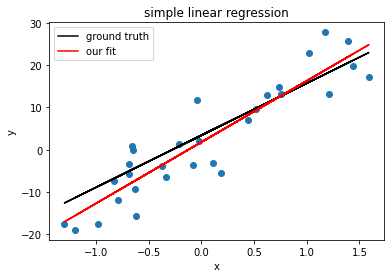

In [186]:
# simulating simple linear regression
import matplotlib.pyplot as plt   # for plotting

# pick random b_0 and b_1 - let's see how we recover these
b = np.array([3.4, 12.35])    # slope, intercept
b = b[:, np.newaxis]

# simulate n datapoints. the x is normally distributed
n = 30
data_mean = 0
data_std = 1
data = np.random.normal(data_mean, data_std, size=(n,1)) # make it 2d array for ease

# remember that since we have b_0 in our vector weights, we add a column of 1s to our data matrix
ones = np.ones((n,1))
x = np.hstack((ones, data)) # x is our design matrix

# add gaussian noise
noise_loc = 0
noise_scale = 5
e = np.random.normal(loc=noise_loc, scale=noise_scale, size=(n,1))

# simulate y values
y = x.dot(b) + e

# get estimates for b, predictions
b_hat = np.linalg.inv(x.T @ x) @ x.T @ y
y_hat = x.dot(b_hat)

# R^2
SS_res = e.T @ e
std = y - y.mean()
SS_tot = std.T @ std
r2 = 1 - (SS_res / SS_tot)

# plot data
fig, ax = plt.subplots()
ax.scatter(data, y) # plotting data
ax.set(xlabel='x', ylabel='y', title='simple linear regression')

# plot true line
b_0, b_1 = b
ax.plot(data, b_0 + (b_1 * data), color='k', label='ground truth')

# plot our fit
ax.plot(data, y_hat, color='r', label='our fit')
ax.legend()

print('true b:\n', b)
print('our estimate:\n', b_hat)
print('r^2:', r2)